In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
my_data = pd.read_csv('archive.zip')


In [4]:
my_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [7]:
X=my_data.drop('price',axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,4880,3,1,1,1,0,0,0,0,2,1,0,1,1626.666667,0.333333
541,2000,2,1,2,1,0,0,0,0,0,0,1,0,1000.000000,0.500000
542,8250,3,1,1,1,0,0,0,0,0,0,0,0,2750.000000,0.333333
543,11410,2,1,2,1,0,0,0,0,0,1,0,0,5705.000000,0.500000


In [8]:
y=my_data[['price']]
y

,price
0,5250000
1,4480000
2,3570000
3,2870000
4,3570000
...,...
540,4403000
541,2660000
542,4480000
543,5110000


In [9]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [11]:
linear.coef_ #value of theetha coeffiecient

array([[ 4.09334563e+02, -1.34951079e+05,  9.61529391e+05,
         4.45631932e+05,  4.64578779e+05,  2.44158586e+05,
         4.17480818e+05,  9.46647708e+05,  9.25614766e+05,
         2.83905842e+05,  4.95968818e+05, -1.82179440e+05,
        -4.94446377e+05, -4.69415952e+02, -2.28491363e+05]])

In [13]:
linear.intercept_

array([979938.3629121])

In [15]:
linear.score(X_test, y_test)

0.6472377084974581

                 price  area  bedrooms  bathrooms  stories  mainroad  \
price             1.00  0.54      0.37       0.52     0.42      0.30   
area              0.54  1.00      0.15       0.19     0.08      0.29   
bedrooms          0.37  0.15      1.00       0.37     0.41     -0.01   
bathrooms         0.52  0.19      0.37       1.00     0.33      0.04   
stories           0.42  0.08      0.41       0.33     1.00      0.12   
mainroad          0.30  0.29     -0.01       0.04     0.12      1.00   
guestroom         0.26  0.14      0.08       0.13     0.04      0.09   
basement          0.19  0.05      0.10       0.10    -0.17      0.04   
hotwaterheating   0.09 -0.01      0.05       0.07     0.02     -0.01   
airconditioning   0.45  0.22      0.16       0.19     0.29      0.11   
parking           0.38  0.35      0.14       0.18     0.05      0.20   
prefarea          0.33  0.23      0.08       0.06     0.04      0.20   
semi-furnished    0.06  0.01      0.05       0.03    -0.00      

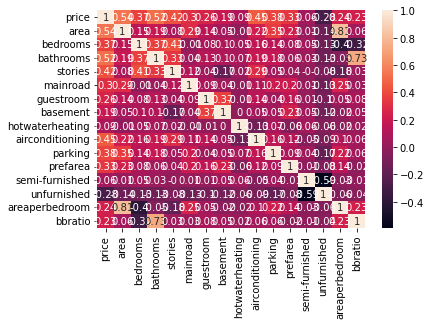

In [16]:
#correlation plotting
correlation_matrix = my_data.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

c:\Users\daniyal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


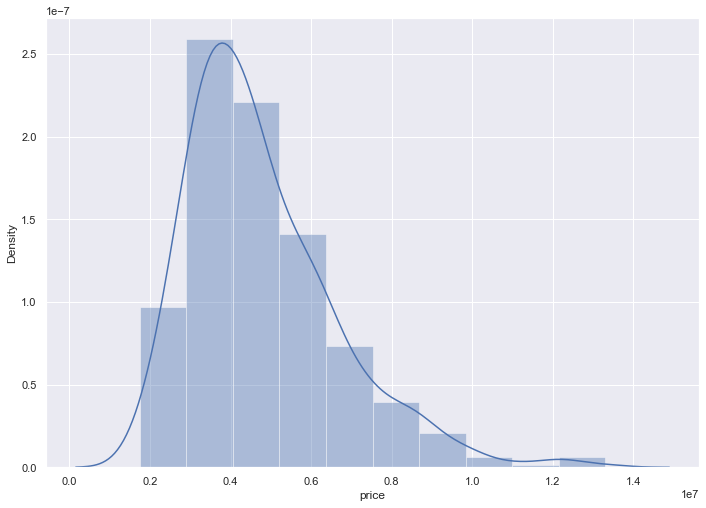

In [18]:
#histogram plotting
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(my_data['price'], bins=10)
plt.show()

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# model evaluation for training set
y_train_predict = linear.predict(X_train)
testPred = linear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = linear.predict(X_test)
rmse = (mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1041877.7256956503
R2 score is 0.6888383063825936


The model performance for testing set
--------------------------------------
RMSE is 1234371308896.123
R2 score is 0.6472377084974581
